In [1]:
#Preprocessing of the dataset: 
'''
dataset : random_scenario_bi_flow_features.csv 
          http://localhost:8888/edit/Documents/mini-project/2nd%20time/Complete_Project/random_scenario_bi_flow_features.csv

Preprocessing : http://localhost:8888/notebooks/Documents/mini-project/2nd%20time/Complete_Project/preprocessing.ipynb

Preprocessed dataset
preprocessed_random : http://localhost:8888/edit/Documents/mini-project/2nd%20time/Complete_Project/Processed_random.csv

'''

'\ndataset : random_scenario_bi_flow_features.csv \n          http://localhost:8888/edit/Documents/mini-project/2nd%20time/Complete_Project/random_scenario_bi_flow_features.csv\n\nPreprocessing : http://localhost:8888/notebooks/Documents/mini-project/2nd%20time/Complete_Project/preprocessing.ipynb\n\nPreprocessed dataset\npreprocessed_random : http://localhost:8888/edit/Documents/mini-project/2nd%20time/Complete_Project/Processed_random.csv\n\n'

Accuracy: 0.7512437810945274
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        93
           1       0.63      0.66      0.64        90
           2       0.65      0.61      0.63        90
           3       0.60      0.50      0.55        42
           4       0.79      0.78      0.78       202
           5       0.58      0.59      0.59        64
           6       0.52      0.39      0.44        80
           7       0.69      0.68      0.68        81
           8       0.83      0.86      0.84       418
           9       0.63      0.69      0.66       108
          10       0.76      0.79      0.77       198
          11       0.77      0.76      0.76       164
          12       0.80      0.79      0.80       273
          13       0.79      0.81      0.80       107

    accuracy                           0.75      2010
   macro avg       0.70      0.69      0.70      2010
weighted avg       0.75     

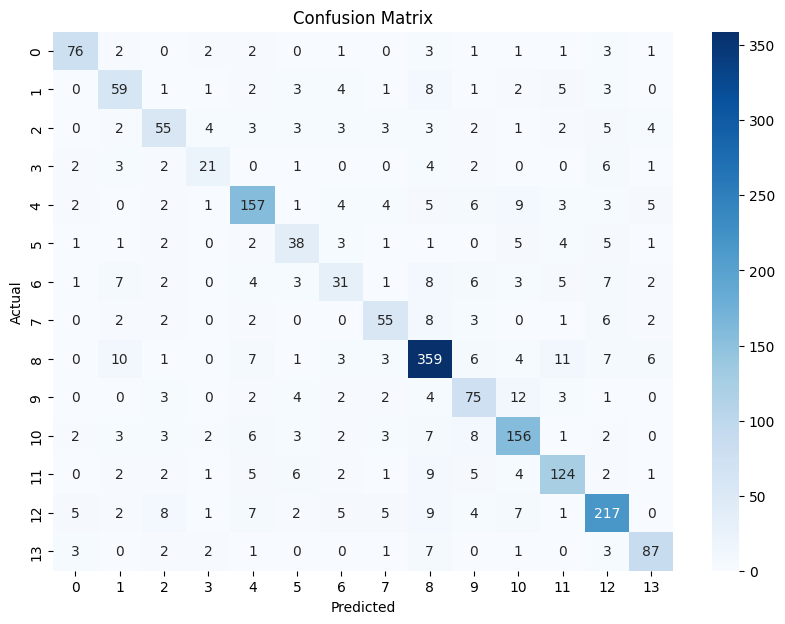

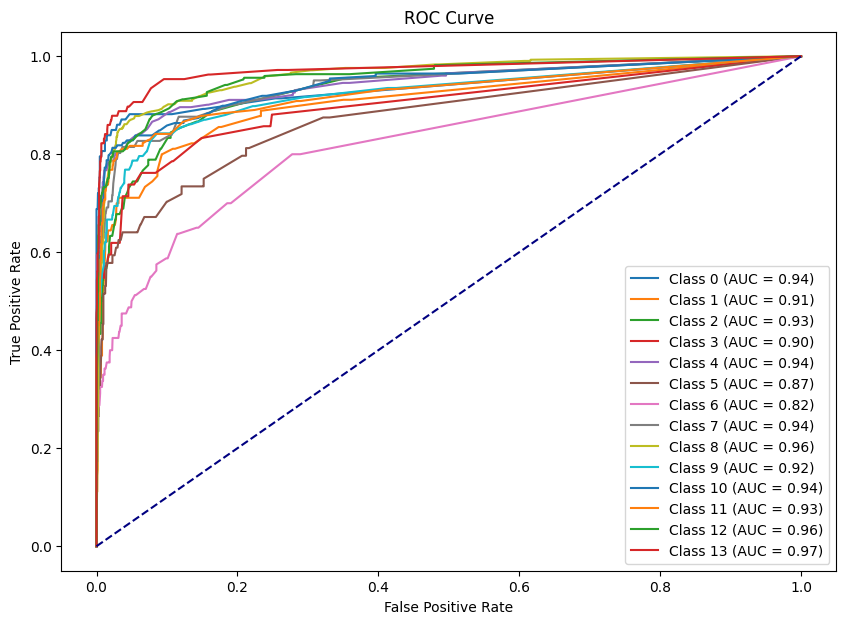

In [2]:
#Simple random forest on preprocessed_random
'''
    Here I have applied random_forest on the Preprocessed_random.csv (random_senario_bi_flow_features.csv)
    I have not used action while training the model, because action may not be present everytime.
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Processed_random.csv')

if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

#Removing actions
data=data.drop('action',axis=1)

# Separate features and target
X = data.drop(columns=['app'])
y = data['app']

# print(X.head()) 

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)  # Use this for ROC curve

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (only for binary classification or using One-vs-Rest for multi-class)
plt.figure(figsize=(10, 7))
for i, class_label in enumerate(rf_model.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [3]:
#Experimenting with dataset
'''
Different scaling methods experiment: (scaling_methods.ipynb)
    http://localhost:8888/notebooks/Documents/mini-project/2nd%20time/Complete_Project/scaling_methods.ipynb

Analyzing best resampling method to choose, Hypertuning Random forest : (Working_on_random.ipynb)
    http://localhost:8888/notebooks/Documents/mini-project/2nd%20time/Complete_Project/Working_on_random.ipynb

'''


'\nDifferent scaling methods experiment: (scaling_methods.ipynb)\n    http://localhost:8888/notebooks/Documents/mini-project/2nd%20time/Complete_Project/scaling_methods.ipynb\n\nAnalyzing best resampling method to choose, Hypertuning Random forest : (Working_on_random.ipynb)\n    http://localhost:8888/notebooks/Documents/mini-project/2nd%20time/Complete_Project/Working_on_random.ipynb\n\n'

In [4]:
'''
    Since the dataset is imbalance i.e. classes 8, 12, 4, 10 have more than thousand instances while classes 7, 5, 6, 3 has about 350 instances.
    So the dataset is blanaced using 3 techniques
    1. SMOTE - Synthetic Minority Oversampling Technique ; stored in balanced_random_smote.csv
    2. ENN - Edited Nearest Neighbors (Majority Undersampling techinque) ; stored in balanced_random_enn.csv
    3. SMOTE ENN - both undersampling and oversampling techinque ; stored in balanced_random_smoteenn.csv

    All the process is in the file "Resamapling".

Resampling:
    http://localhost:8888/notebooks/Documents/mini-project/2nd%20time/Complete_Project/Resampling.ipynb
    
    Applying Random forest on balanced dataset and along with their respective hypertuning is in the file "Working_on_random" 
'''

'\n    Since the dataset is imbalance i.e. classes 8, 12, 4, 10 have more than thousand instances while classes 7, 5, 6, 3 has about 350 instances.\n    So the dataset is blanaced using 3 techniques\n    1. SMOTE - Synthetic Minority Oversampling Technique ; stored in balanced_random_smote.csv\n    2. ENN - Edited Nearest Neighbors (Majority Undersampling techinque) ; stored in balanced_random_enn.csv\n    3. SMOTE ENN - both undersampling and oversampling techinque ; stored in balanced_random_smoteenn.csv\n\n    All the process is in the file "Resamapling".\n\nResampling:\n    http://localhost:8888/notebooks/Documents/mini-project/2nd%20time/Complete_Project/Resampling.ipynb\n    \n    Applying Random forest on balanced dataset and along with their respective hypertuning is in the file "Working_on_random" \n'

In [5]:
'''
multimodal for preprocessed:
    http://localhost:8888/notebooks/Documents/mini-project/2nd%20time/Complete_Project/multimodal_random.ipynb
    
multimodal for smoteenn:
    http://localhost:8888/notebooks/Documents/mini-project/2nd%20time/Complete_Project/multimodal_random_smoteenn.ipynb

'''

'\nmultimodal for preprocessed:\n    http://localhost:8888/notebooks/Documents/mini-project/2nd%20time/Complete_Project/multimodal_random.ipynb\n    \nmultimodal for smoteenn:\n    http://localhost:8888/notebooks/Documents/mini-project/2nd%20time/Complete_Project/multimodal_random_smoteenn.ipynb\n\n'

In [6]:
'''
multimodal :
    http://localhost:8888/notebooks/Documents/mini-project/2nd%20time/Complete_Project/Multimodal.ipynb
    
    Applied multimodal Autoencoder 
    its in the file Multimodal
    obtained an acuuracy of 82.12%
    a snippet of evalution is as below tested with balanced_random_smoteenn.csv
'''

'''
    Wild_test_senerio dataset is considered for preparing test_dataset.csv
    then it is used for testing the proposed model
'''


'\n    Wild_test_senerio dataset is considered for preparing test_dataset.csv\n    then it is used for testing the proposed model\n'

In [7]:

import tensorflow as tf
from tensorflow.keras.models import Model, load_model
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
from itertools import cycle

def evaluate_models(test_data_path, model_paths):
    """
    Evaluate multiple models on test data
    
    Args:
        test_data_path: Path to test dataset
        model_paths: Dictionary containing paths to all models and preprocessors
    """
    # Load models and preprocessors
    autoencoder = load_model(model_paths['autoencoder'])
    rf_classifier = joblib.load(model_paths['random_forest'])
    knn_classifier = joblib.load(model_paths['knn'])
    xgb_classifier = joblib.load(model_paths['xgboost'])
    scalers = joblib.load(model_paths['scalers'])
    protocol_encoder = joblib.load(model_paths['protocol_encoder'])
    
    # Load and preprocess test data
    test_data = pd.read_csv(test_data_path)
    test_labels = test_data['app']
    
    # Preprocess features using loaded scalers
    scaled_features = {}

    # Protocol encoding
    protocol_encoded = protocol_encoder.transform(test_data[['protocal']])
    protocol_df = pd.DataFrame(protocol_encoded, 
                             columns=[f'protocol_{i}' for i in range(protocol_encoded.shape[1])])
    
    # Process IP addresses
    test_data['ip_A'] = test_data['ip_A'].astype(str).apply(lambda x: int(x.split('.')[-1]))
    test_data['ip_B'] = test_data['ip_B'].astype(str).apply(lambda x: int(x.split('.')[-1]))
    
    # Feature engineering
    test_data['ul_byte_pkt_ratio'] = test_data['ul_total_num_bytes'] / (test_data['ul_total_num_pkts'] + 1e-6)
    test_data['dl_byte_pkt_ratio'] = test_data['dl_total_num_bytes'] / (test_data['dl_total_num_pkts'] + 1e-6)
    test_data['total_duration'] = test_data['ul_dur'] + test_data['dl_dur']
    
    # Log transform temporal features
    temporal_features = ['ul_min_iat', 'ul_max_iat', 'ul_mean_iat', 'ul_std_iat', 'ul_dur',
                        'dl_min_iat', 'dl_max_iat', 'dl_mean_iat', 'dl_std_iat', 'dl_dur']
    for col in temporal_features:
        test_data[col] = np.log1p(test_data[col])
    
    # Define feature sets
    feature_sets = {
        'ul_flow': ['ul_total_num_pkts', 'ul_total_num_bytes', 'ul_min_pkt_size', 
                    'ul_max_pkt_size', 'ul_mean_pkt_size', 'ul_std_pkt_size', 'ul_byte_pkt_ratio'],
        'dl_flow': ['dl_total_num_pkts', 'dl_total_num_bytes', 'dl_min_pkt_size', 
                    'dl_max_pkt_size', 'dl_mean_pkt_size', 'dl_std_pkt_size', 'dl_byte_pkt_ratio'],
        'temporal': temporal_features + ['total_duration'],
        'protocol': ['ip_A', 'ip_B', 'port_A', 'port_B']
    }
    
    # Scale features using loaded scalers
    for name, feature_list in feature_sets.items():
        if name == 'protocol':
            features = pd.concat([test_data[feature_list], protocol_df], axis=1)
        else:
            features = test_data[feature_list]
        scaled_features[name] = scalers[name].transform(features)
    
    # Get latent representation
    encoder = Model(inputs=autoencoder.inputs,
                   outputs=autoencoder.get_layer('latent_space').output)
    latent_features = encoder.predict(list(scaled_features.values()))
    
    # Dictionary of models to evaluate
    models = {
        'Random Forest': rf_classifier,
        'KNN': knn_classifier,
        'XGBoost': xgb_classifier
    }
    
    # Evaluate each model
    results = {}
    
    for model_name, model in models.items():
        # Make predictions
        predictions = model.predict(latent_features)
        probabilities = model.predict_proba(latent_features)
        
        # Calculate metrics
        metrics = {
            'Accuracy': accuracy_score(test_labels, predictions),
            'Precision': precision_score(test_labels, predictions, average='weighted'),
            'Recall': recall_score(test_labels, predictions, average='weighted'),
            'F1 Score': f1_score(test_labels, predictions, average='weighted')
        }
        
        # Generate confusion matrix
        cm = confusion_matrix(test_labels, predictions)
        
        # Generate classification report
        report = classification_report(test_labels, predictions)
        
        # Calculate ROC curves
        classes = np.unique(test_labels)
        y_test_bin = label_binarize(test_labels, classes=classes)
        n_classes = y_test_bin.shape[1]
        
        # Store all results
        results[model_name] = {
            'metrics': metrics,
            'confusion_matrix': cm,
            'classification_report': report,
            'predictions': predictions,
            'probabilities': probabilities,
            'y_test_bin': y_test_bin,
            'classes': classes
        }
    
    # Plotting functions
    def plot_confusion_matrices(results):
        fig, axes = plt.subplots(1, 3, figsize=(24, 8))
        fig.suptitle('Confusion Matrices Comparison', fontsize=16)
        
        for i, (model_name, result) in enumerate(results.items()):
            sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'{model_name} Confusion Matrix')
            axes[i].set_ylabel('True Label')
            axes[i].set_xlabel('Predicted Label')
        
        plt.tight_layout()
        plt.show()
    
    # def plot_roc_curves(results):
    #     plt.figure(figsize=(12, 8))
    #     colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
        
    #     for model_name, result in results.items():
    #         for i, (color, class_name) in enumerate(zip(colors, result['classes'])):
    #             fpr, tpr, _ = roc_curve(result['y_test_bin'][:, i], result['probabilities'][:, i])
    #             roc_auc = auc(fpr, tpr)
    #             plt.plot(fpr, tpr, color=color, lw=2,
    #                     label=f'{model_name} - {class_name} (AUC = {roc_auc:0.2f})')
        
    #     plt.plot([0, 1], [0, 1], 'k--', lw=2)
    #     plt.xlim([0.0, 1.0])
    #     plt.ylim([0.0, 1.05])
    #     plt.xlabel('False Positive Rate')
    #     plt.ylabel('True Positive Rate')
    #     plt.title('ROC Curves Comparison')
    #     plt.legend(loc="lower right", bbox_to_anchor=(1.7, 0.5))
    #     plt.tight_layout()
    #     plt.show()
    
    # Print results
    print("\nModel Performance Comparison:")
    print("=" * 50)
    for model_name, result in results.items():
        print(f"\n{model_name} Results:")
        print("-" * 30)
        for metric, value in result['metrics'].items():
            print(f"{metric}: {value:.4f}")
        
        print(f"\n{model_name} Classification Report:")
        print(result['classification_report'])
    
    # Generate plots
    plot_confusion_matrices(results)
    # plot_roc_curves(results)
    
    return results

if __name__ == "__main__":
    model_paths = {
        'autoencoder': 'enhanced_autoencoder.h5',
        'random_forest': 'rf_classifier.pkl',
        'knn': 'knn_classifier.pkl',
        'xgboost': 'xgb_classifier.pkl',
        'scalers': 'scalers.pkl',
        'protocol_encoder': 'protocol_encoder.pkl'
    }
    
    results = evaluate_models('test_dataset.csv', model_paths)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'enhanced_autoencoder.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)